# 700778365_Keerthana Aluru


In [ ]:
from keras.layers import Input, Dense
from keras.models import Model
from keras.datasets import mnist, fashion_mnist
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Modified autoencoder with an additional hidden layer
encoding_dim = 32  # Size of encoded representation

# Define the input placeholder (for 28x28 images flattened to 784)
input_img = Input(shape=(784,))

# Encoder
encoded = Dense(128, activation='relu')(input_img)  # First hidden layer
encoded = Dense(64, activation='relu')(encoded)     # Additional hidden layer
encoded = Dense(32, activation='relu')(encoded)     # Bottleneck layer

# Decoder
decoded = Dense(64, activation='relu')(encoded)     # Expanding from bottleneck
decoded = Dense(128, activation='relu')(decoded)
decoded = Dense(784, activation='sigmoid')(decoded)  # Reconstructing the original input

# Model
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# Load the Fashion MNIST dataset
(x_train, _), (x_test, _) = fashion_mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

# Train autoencoder
history = autoencoder.fit(x_train, x_train,
                          epochs=50,
                          batch_size=256,
                          shuffle=True,
                          validation_data=(x_test, x_test))


29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Epoch 1/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 7s 14ms/step - loss: 0.4548 - val_loss: 0.3194
Epoch 2/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.3136 - val_loss: 0.3067
Epoch 3/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.3030 - val_loss: 0.3017
Epoch 4/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.2987 - val_loss: 0.2978
Epoch 5/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.2946 - val_loss: 0.2954
Epoch 6/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.2925 - val_loss: 0.2933
Epoch 7/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.2906 - val_loss: 0.2917
Epoch 8/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.2891 - val_loss: 0.2905
Epoch 9/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.2877 - val_loss: 0.2902
Epoch 10/50
235/235 ━━━━━━━━━━━━━━━━━

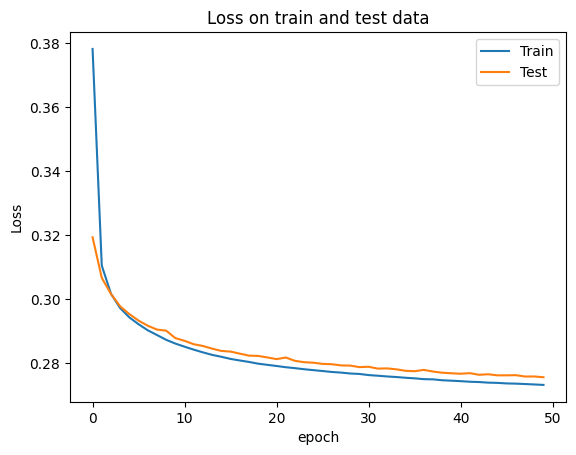

In [ ]:
# plot loss and accuracy using history object

plt.plot(autoencoder.history.history['loss'])
plt.plot(autoencoder.history.history['val_loss'])
plt.xlabel("epoch")
plt.ylabel("Loss")
plt.title("Loss on train and test data")
plt.legend(['Train','Test'],loc='upper right')
plt.show()

In [ ]:
# plot the test image
def validate_image(data):

    random_sample = np.random.choice(data.shape[0],1,replace = False)
    print(f"Tesing on image {random_sample[0]} \n")

    # plot a sample of test data
    plt.imshow(data[random_sample].reshape(28,28))
    plt.show()

    # plot the sample using reconstructed test data

    pred = autoencoder.predict(data[random_sample].reshape(-1,784))
    plt.imshow(pred.reshape(28,28))
    plt.show()

Tesing on image 7823 



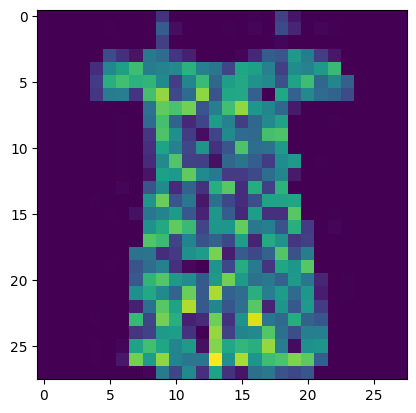

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


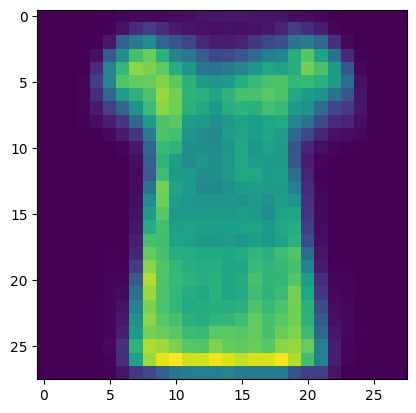

In [ ]:
validate_image(x_test)

Video URL : https://drive.google.com/file/d/19An4OSLhr9IuQkzvQa9qLi3kFu5fPIpt/view?usp=sharing